## Q1请在 titanic数据集里面，绘制P_class 的误差图，误差可以自己定义


In [1]:
import matplotlib.pyplot as plt
# 支持中文显示
plt.rcParams['font.sans-serif'] = ['STFangsong']
plt.rcParams['axes.unicode_minus'] = False
import pandas as pd

In [2]:
#读取数据
Titanic = pd.read_csv('titanic_train.csv')
Titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
a = Titanic['Pclass'].value_counts()
a

3    491
1    216
2    184
Name: Pclass, dtype: int64

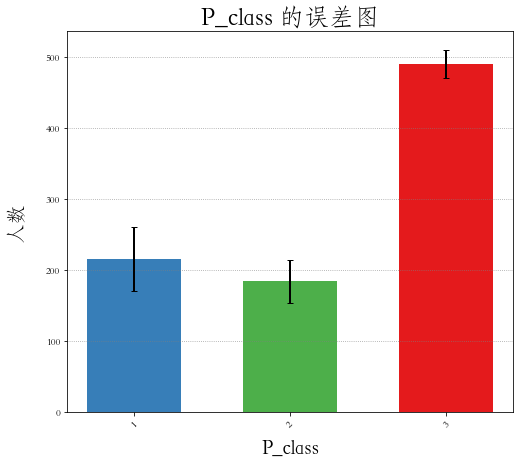

In [6]:
std_err = [20,45,30]
error_attri = dict(elinewidth=2,ecolor='black',capsize=3)
colors= ['#e41a1c','#377eb8','#4daf4a']
fig =plt.figure(figsize=(8,7)) # 创建画布
plt.bar(a.index.values,a,width=0.6,align='center',yerr=std_err,error_kw=error_attri,color= colors,
        tick_label=a.index)
plt.xticks(rotation=45)
plt.xlabel('P_class',fontsize = 20,labelpad =10)
plt.ylabel('人数',fontsize = 20,labelpad =20)
plt.grid(True,axis='y',ls=':',color='gray',alpha=0.8)
plt.title('P_class 的误差图',fontsize = 25)
plt.show()

## Q2 在数据集creditcard_exp，统计不同edu_class的平均收入，并绘制柱状图，向其中插入平均收入的数据表格


In [7]:
#读取数据
df = pd.read_csv('creditcard_exp.csv')
df.head(2)

,id,Acc,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,age2,high_avg,edu_class
0,19,1,1217.03,7.104168743,1,40,16.03515,1,1,99.93,15.932789,1600,0.102361,3
1,5,1,1251.5,7.132098111,1,32,15.84750,1,0,49.88,15.796316,1024,0.051184,2


In [10]:
a = df.groupby('edu_class')['Income'].mean()
a

edu_class
0    3.019650
1    4.848185
2    7.219650
3    9.746405
Name: Income, dtype: float64

In [12]:
import numpy as np

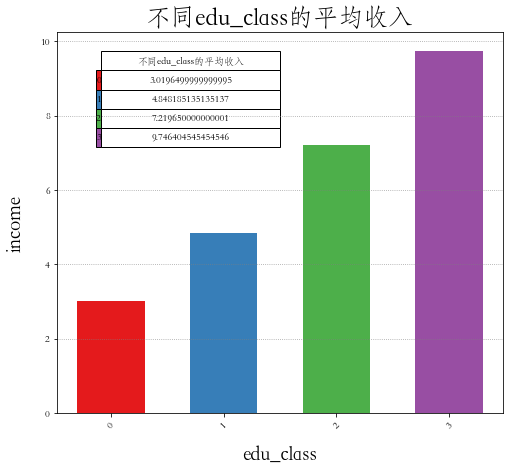

In [28]:
colors= ['#e41a1c','#377eb8','#4daf4a','#984ea3']
fig =plt.figure(figsize=(8,7)) # 创建画布
plt.bar(a.index.values,a,width=0.6,align='center',color= colors,
        tick_label=a.index)
plt.xticks(rotation=45)
plt.xlabel('edu_class',fontsize = 20,labelpad =15)
plt.ylabel('income',fontsize = 20,labelpad =15)
plt.grid(True,axis='y',ls=':',color='gray',alpha=0.8)
plt.title('不同edu_class的平均收入',fontsize = 25)
# 添加表格
col_labels = ['不同edu_class的平均收入']
row_labels = a.index
table_vals =np.array(a).reshape(-1,1)
col_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']
my_table = plt.table(cellText=table_vals,cellLoc='center' ,colWidths=[2] * 6,
   rowLabels=row_labels, colLabels=col_labels,rowColours=col_colors,bbox=[0.1,0.7,0.4,0.25])
plt.show()

## Q3 在数据集Prod_Trade，绘制每天的sales趋势

In [31]:
#读取数据
df = pd.read_excel('Prod_Trade.xlsx', parse_dates=['Date']).sort_values('Date')
df.head(2)

,Date,Order_Class,Sales,Transport,Trans_Cost,Region,Category,Box_Type
4030,2009-01-01,高级,180.36,火车,4.69,华东,办公用品,小型箱子
1913,2009-01-01,其它,872.48,空运,35.00,华南,办公用品,大型箱子


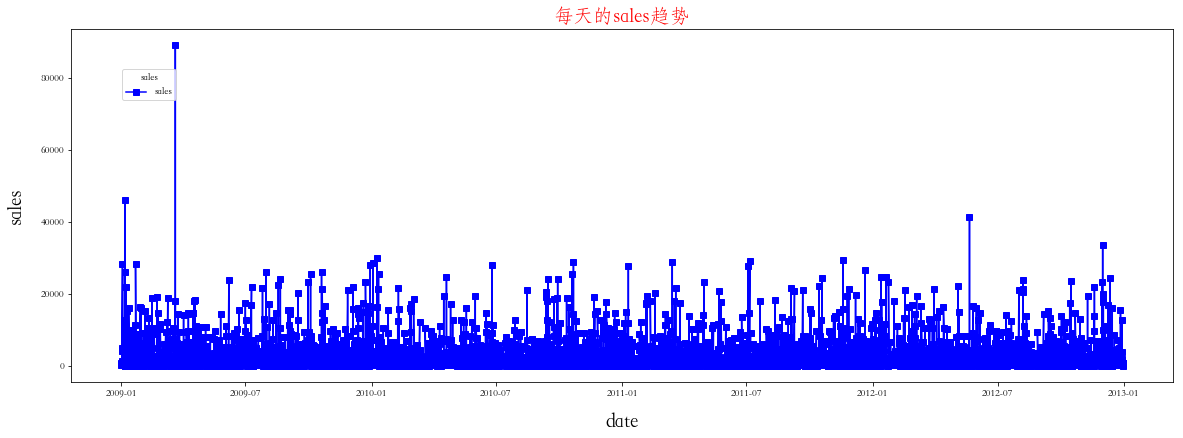

In [34]:
date = df['Date'] ## 提取其中的columns数组，视为数据的标签
values = df['Sales']## 提取其中的values数组，数据的存在位置
fig =plt.figure(figsize=(18,7)) # 创建画布
ax = fig.add_axes([0.10,0.2,0.85,0.7]) # Axes是画布上的绘图区域，可以添加多块
plt.plot(date,values,'bs-',label='sales')
plt.xlabel('date',labelpad=15,fontsize=20)## 添加横轴标签
plt.ylabel('sales',labelpad=15,fontsize=20,style='oblique')## 添加y轴名称
plt.title('每天的sales趋势',fontsize=20,color='red')## 添加图表标题
plt.legend(loc='upper right',bbox_to_anchor=(0.10,0.9),ncol=1, frameon=True, #是否要边框
           title ='sales',shadow=False, fancybox=True)
plt.show()